In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
from IPython import display
import time

In [2]:
gym.__version__

'1.0.0'

In [3]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):

    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon

    return np.random.choice(np.arange(action_n), p=policy)

In [4]:
# env = gym.make("Taxi-v3")
env = gym.make("Taxi-v3", render_mode="rgb_array")

In [9]:
def q_learning(env, episode_n, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5):
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде

    Q = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями
    epsilon = 1  # Инициализируем действием рандомный шанс

    total_rewards = []  # Создаем массив для хранения общих вознаграждений для каждого эпизода
    mean_rewards = []  # Создаем массив для хранения средних вознаграждений для каждого эпизода
    for episode in range(episode_n):  # Запускаем цикл для каждого эпизода

        total_reward = 0  # Инициализируем общую сумму вознаграждений для 100 эпизодов
        state, _ = env.reset()  # Инициализируем состояние и действие в среде

        for t in range(t_max):  # Запускаем цикл для каждого шага в эпизоде

            # Делаем действие с рандомным шансом epsilon

            action = get_epsilon_greedy_action(Q[state], epsilon, action_n)  # Делаем действие с шансом epsilon
            next_state, reward, done, _, _ = env.step(action)  # Делаем шаг в среде и получаем результат

            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])  # Обновляем Q-функцию

            total_reward += reward  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода

            if done:  # Если эпизод завершён, то выходим из цикла
                break

            state = next_state  # Обновляем состояние в среде

        epsilon = max(0, epsilon - 1 / noisy_episode_n)  # Обновляем действием шанс

        if (episode + 1) % 100 == 0:
            total_rewards.append(total_reward)  # Добавляем вознаграждение к общей сумме вознаграждений для 100 эпизодов
            mean_rewards.append(total_reward / (episode + 1))  # Добавляем вознаграждение к средней сумме вознаграждений для 100 эпизодов

    return total_rewards, mean_rewards, Q  # Возвращаем общие вознаграждения для каждого эпизода

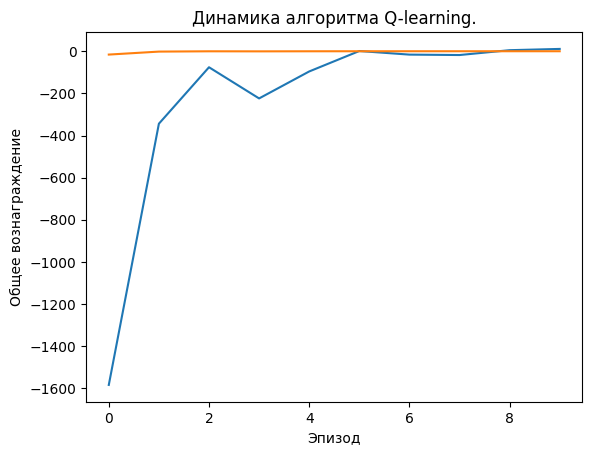

In [10]:
total_rewards, mean_rewards, Q = q_learning(env, episode_n=1000, noisy_episode_n=1000, t_max=500, gamma=0.999, alpha=0.5)

plt.plot(total_rewards)
plt.plot(mean_rewards)
plt.title('Динамика алгоритма Q-learning.')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

In [12]:
# Функция для отображения работы агента в среде
def show_agent_work(env, Q, episodes=5, t_max=500):
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    img = plt.imshow(env.render())
    # Перебираем количество эпизодов, в которых хотим посмотреть работу агента
    for episode in range(episodes):
        state, _ = env.reset()  # Сброс среды до начального состояния
        done = False
        epsilon = 1

        for t in range(t_max):
            env.render()  # Отображение окружения
            action = np.argmax(Q[state]) # Выбираем наилучшее действие на основе Q-значений
            state, reward, done, _, _ = env.step(action)  # Выполняем действие
            
            frame = env.render()
            img.set_data(frame)

            print(f"Episode {episode + 1}")
            display.display(plt.gcf())
            display.clear_output(wait=True)

            time.sleep(1)  # Ждём 1 секунду, чтобы следить за действиями агента

            if done:
                print(f"Episode finished after {t + 1} timesteps")
                break

    env.close()  # Закрываем окно визуализации

Episode finished after 14 timesteps


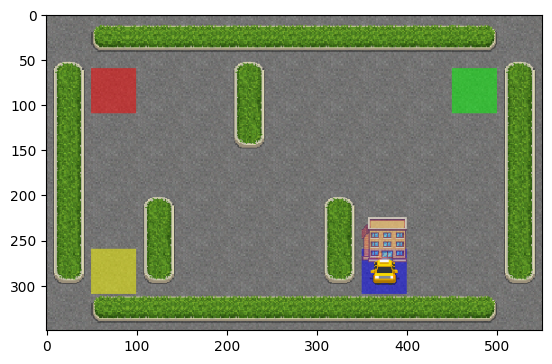

In [23]:
show_agent_work(env, Q)